<a href="https://colab.research.google.com/github/JohnSRX/Machine-Learning-Portfolio/blob/Principal-Component-Analysis/PCA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/wine.csv")
df.head()


,Wine_type,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
print(df.shape)

(178, 14)


In [ ]:
import numpy as np
labels = np.reshape(df, (178,14))
final_wine_data=np.concatenate([df,labels],axis=1)
final_wine_data.shape

(178, 28)

In [ ]:
import pandas as pd
wine_dataset = pd.DataFrame(final_wine_data)

In [ ]:
features=df.columns

In [ ]:
features_labels=np.append(features,'label')
wine_dataset.columns=features_labels
wine_dataset.head()


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
x=wine_dataset
x=StandardScaler().fit_transform(x) 
x.shape
np.mean(x), np.std(x)

(-1.1476462726462293e-16, 1.0)

In [ ]:
feat_cols=['features'+str(i) for i in range(x.shape[1])]
normalized_wine=pd.DataFrame(x,columns=feat_cols)
normalized_wine.head()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features18,features19,features20,features21,features22,features23,features24,features25,features26,features27
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,...,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,...,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,...,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,...,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,...,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
from sklearn.decomposition import PCA
pca_wine=PCA(n_components=2)
principalComponents_wine=pca_wine.fit_transform(x)

In [ ]:
principal_wine_DF=pd.DataFrame(data=principalComponents_wine, columns=['principal component1', 'principal component2'])
principal_wine_DF.head()

,principal component1,principal component2
0,-4.982181,-2.054992
1,-3.576345,0.466718
2,-3.938626,-1.466449
3,-5.547378,-3.914840
4,-1.990521,-1.227216


In [ ]:
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_))

Explained variation per principal component: [0.39542486 0.17836259]


<Figure size 432x288 with 0 Axes>

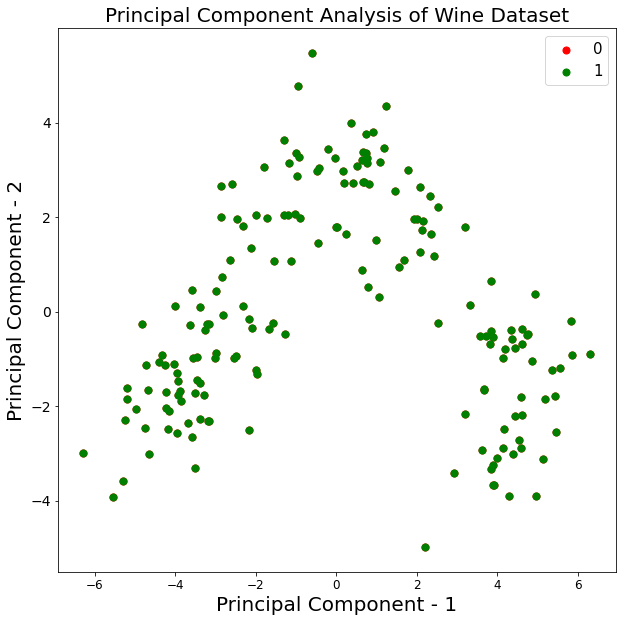

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    plt.scatter(principal_wine_DF['principal component1']
               , principal_wine_DF['principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

IndexError: ignored

<Figure size 432x288 with 0 Axes>

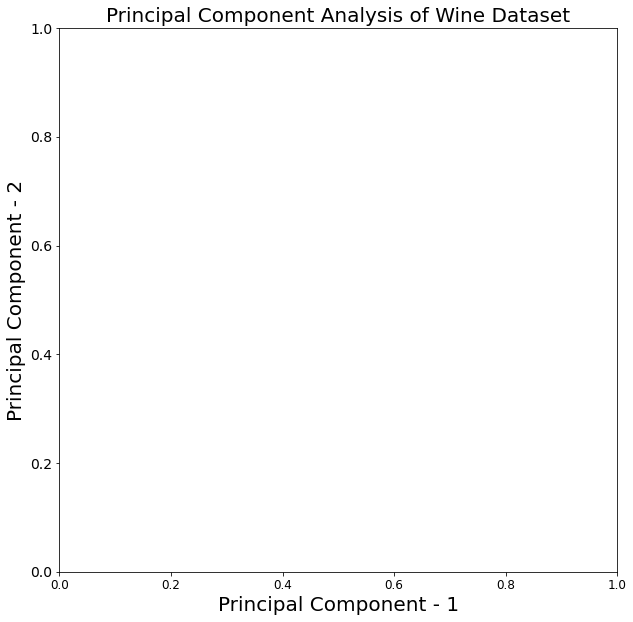

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = wine_dataset.columns == target
    plt.scatter(principal_wine_DF.loc[indicesToKeep, 'principal component1']
               , principal_wine_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})